# HW 1 Samuel Hamilton

Question 1

In [2]:
import numpy as np

In [4]:
class Trainenv:
    """Environment for shuttle problem
    """
    
    def __init__(self, shape =[201]):
        
        self.shape = shape
        nS = np.prod(shape) #Number of states = passengers
        nA = 2 #Number of actions (leave/stay)
        cost_waiting = 2
        cost_dispatch = 100
        capacity = 15
        
        
        P = {}
        grid = np.arange(nS).reshape(shape)
        it = np.nditer(grid, flags =['multi_index'])
        
        while not it.finished:
            s = it.iterindex
            # P[s][a] = (prob, next_state,reward, is_done)
            P[s] = {a : {o : [] for o in range(6)} for a in range(nA)} #o = outcome
            is_done = lambda s: s == 0 or s == 0 #(nS - 1)
            reward_stay = -(s * cost_waiting) 
            reward_launch = -((s * cost_waiting) + cost_dispatch)
            for people_arriving in range(5): #fix later
                ns_stay = s + people_arriving if s + people_arriving < 200 else 200    #if it overflows limit to 200
                ns_launch = s + people_arriving - capacity if s > 15 else people_arriving #if they have less that 15 only arrivers
        
        #probdist 
    
                P[s][0][people_arriving] = [(.2,ns_stay,reward_stay,is_done(ns_stay))]
                P[s][1][people_arriving] = [(.2,ns_launch,reward_launch,is_done(ns_stay))]
            it.iternext()
    
        # Initial state distribution is uniform
        isd = np.ones(nS) / nS
        
        #Expose model for educational purposes
        self.P = P
        self.nS = nS
        self.nA = nA
       # super(Trainenv, self).__init__(nS, nA, P, isd)
    
    
env = Trainenv()

In [10]:
#Enumeration function:
def enumeration(env,discount_factor = .95,T = 100):
    
    def one_step_lookahead(state, V):
        """
        Helper function to calculate the value for all actions in a given state
        
        Args:
            state to consider(int)
            V: Value to use as an estimator, Vector of length env.nS
        
        Returns:
            A vector of length env.nA containing the expected value of each section
        """
        A = np.zeros(env.nA)
        for a in range(env.nA):
            for o in range(5):
                prob = env.P[state][a][o][0][0]
                next_state = env.P[state][a][o][0][1]
                reward = env.P[state][a][o][0][2]
                done = env.P[state][a][o][0][3]
                #print(prob)
              #  print(prob * (reward + discount_factor * V[next_state]))
                A[a] += prob * (reward + discount_factor * V[next_state]) # Enumeration function, prob is probability of changing states the env #UPDATE
        return A
    
    
    V_t = np.zeros(env.nS) # Initialize a value of all states
    V_tplus1 = np.zeros(env.nS) # Initialize the value for all states +1
    for t in range(T,-1,-1):
        for s in range(env.nS): # for each state
            A = one_step_lookahead(s, V_tplus1) # calculate the rewards for all actions given that state
            best_action_value = np.max(A) #Maximation is done here
            V_t[s] = best_action_value # put in the value of the best action for this state.
        V_tplus1 = V_t.copy() 
        
    return V_t

V = enumeration(env, discount_factor=.95,T=500) #Calculate value for each state.
print(V[1:5])

[-522.82208467 -536.21669825 -548.90579833 -560.94916095]


### Q1 a

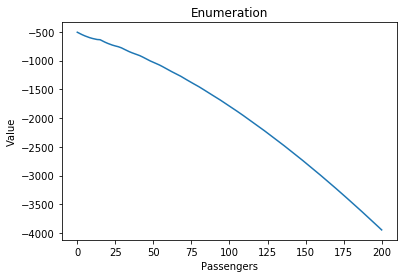

In [7]:
import matplotlib.pyplot as plt
plt.plot(V)
plt.ylabel('Value')
plt.xlabel('Passengers')
plt.title("Enumeration")
plt.show()


In [8]:
#Value iteration function:
def value_iteration(env,theta = .0001, discount_factor = .95):
    
    def one_step_lookahead(state, V):
        """
        Helper function to calculate the value for all actions in a given state
        
        Args:
            state to consider(int)
            V: Value to use as an estimator, Vector of length env.nS
        
        Returns:
            A vector of length env.nA containing the expected value of each section
        """
        A = np.zeros(env.nA)
        for a in range(env.nA):
            for o in range(5):
                prob = env.P[state][a][o][0][0]
                next_state = env.P[state][a][o][0][1]
                reward = env.P[state][a][o][0][2]
                done = env.P[state][a][o][0][3]
               # print(next_state)
              #  print(prob * (reward + discount_factor * V[next_state]))
                A[a] += prob * (reward + discount_factor * V[next_state]) # Enumeration function, prob is probability of changing states the env #UPDATE
        return A
        

    V = np.zeros(env.nS) # Initialize a value of all states
    while True:
        # Stopping condition
        delta = 0
        #Updata each state...
        for s in range(env.nS):
            # Do a one step lookahead to find the best action
            A = one_step_lookahead(s, V)
            best_action_value = np.max(A)
            # Calculate delta across all states seen so far
            delta = max(delta, np.abs(best_action_value - V[s])) # Get 
            # Update the value function
            V[s] = best_action_value
        #Check if we can stop
        if delta < theta:
            break
    policy = np.zeros([env.nS,env.nA])
    for s in range(env.nS):
        # One step lookahead to find the best action for this state
        A = one_step_lookahead(s, V)
        best_action = np.argmax(A)
        # Always take the best action
        policy[s, best_action] = 1
        
    return policy, V

policy, v = value_iteration(env, discount_factor=.95) #Calculate value for each state.

### Q1b & c

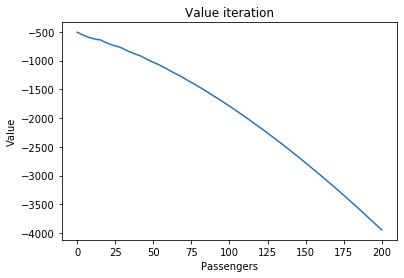

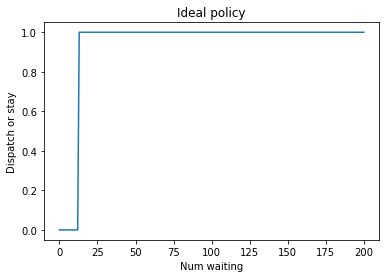

In [9]:
plt.plot(v)
plt.ylabel('Value')
plt.xlabel('Passengers')
plt.title("Value iteration")
plt.show()
plt.plot(policy[:,1])
plt.ylabel('Dispatch or stay')
plt.xlabel('Num waiting')
plt.title("Ideal policy")
plt.show()

## Q2

#### This is impossible to actually model due to the curse of dimensionality, however I altered the equations to work in this hypothetical case

In [2]:
import numpy as np
import random as random

Make all possible arrival outcomes/ people who leave the outcomes, and statespaces

In [ ]:
possibleoutcomes = []
for a in range(5):
    for b in range(5):
        for c in range(5):
            for d in range(5):
                for e in range(5):
                    possibleoutcomes.append((a,b,c,d,e))
addto5 = np.sum(possibleoutcomes[0:len(possibleoutcomes)],axis = 1) == 5
valid = [i for i, x in enumerate(addto5) if x]
validoutcomes = []
for i in valid:
    if possibleoutcomes[i] not in validoutcomes: 
            validoutcomes.append(possibleoutcomes[i])
validoutcomes[0:5]

In [4]:
possibleoutcomes = []
for a in range(30):
    for b in range(30):
        for c in range(30):
            for d in range(30):
                for e in range(30):
                    possibleoutcomes.append((a,b,c,d,e))
addto30 = np.sum(possibleoutcomes[0:len(possibleoutcomes)],axis = 1) == 30

valid = [i for i, x in enumerate(addto30) if x]
validleavers = []
for i in valid:
    if possibleoutcomes[i] not in validleavers: 
            validleavers.append(possibleoutcomes[i])
validleavers[1:5]
                    

46371

In [ ]:
# Model all possible states
states = []
for a in range(100):
    for b in range(100):
        for c in range(100):
            for d in range(100):
                for e in range(100):
                    states.append((a,b,c,d,e))
states[1:5]

In [ ]:
class Trainenv:
    """Environment for fancy shuttle problem
    """
    
    def __init__(self, shape =[len(states)]): # We can now have 100 of each of four passengers
        
        self.shape = shape
        nS = np.prod(shape) #Number of states = passengers
        nA = 2 #Number of actions (leave/stay)
        cost_waiting = (1,1.5,2,2.5,3) # Different cost for each kind of passenger
        cost_dispatch = 100
        capacity = 30
        prob = 1/((len(validoutcomes)*len(validleavers)) + len(validoutcomes)) #The sample of any individual outcome is that of each combination of arrivers and leavers
        
        P = {s : {a : {o : {r : [] for r in validleavers} for o in validoutcomes} for a in range(nA)} for s in states} # We add a level to the dictionary 
        #to account for the variance in who leaves
        for s in states:
            reward_stay = -(np.sum(np.multiply(s,cost_waiting)))
            
            reward_launch = -(np.sum(np.multiply(s,cost_waiting)) + cost_dispatch)
            for people_arriving in validoutcomes: #fix later
                for people_leaving in validleavers:
                    ns_stay = np.clip(np.add(s,people_arriving),0,100)
                    ns_launch = np.clip(np.subtract(np.add(s,people_arriving),people_leaving),0,100) #if they have less that 15 only arrivers
        
        #probdist
                    P[s][0][people_arriving][people_leaving] = [(prob,tuple(ns_stay),reward_stay,is_done)]
                    P[s][1][people_arriving][people_leaving] = [(prob,tuple(ns_launch),reward_launch,is_done)]
                  
    
        # Initial state distribution is uniform
        isd = np.ones(nS) / nS
        
        #Expose model for educational purposes
        self.P = P
        self.nS = nS
        self.nA = nA
       # super(Trainenv, self).__init__(nS, nA, P, isd)
    
    
env = Trainenv()

In [80]:
#Enumeration function: Small changes here to account for the new structure
def enumeration(env,discount_factor = .95,T = 100):
    
    def one_step_lookahead(state, V):
        """
        Helper function to calculate the value for all actions in a given state
        
        Args:
            state to consider(int)
            V: Value to use as an estimator, Vector of length env.nS
        
        Returns:
            A vector of length env.nA containing the expected value of each section
        """
        A = np.zeros(env.nA)
        for a in range(env.nA):
            for o in validoutcomes:
                for r in validleavers:
                    prob = env.P[state][a][o][r][0][0]
                    next_state = env.P[state][a][o][r][0][1]
                    reward = env.P[state][a][o][r][0][2]
                    done = env.P[state][a][o][r][0][3]
                    A[a] += prob * (reward + discount_factor * V[next_state]) # Enumeration function, prob is probability of changing states the env #UPDATE
        return A
    
    
    V_t = {v : 0 for v in states) # Initialize a value of all states
    V_tplus1 = {v1 : 0 for v1 in states) # Initialize a value of all states # Initialize the value for all states +1
    for t in range(T,-1,-1):
        for s in states: # for each state
            A = one_step_lookahead(s, V_tplus1) # calculate the rewards for all actions given that state
            best_action_value = np.max(A) #Maximation is done here
            V_t[s] = best_action_value # put in the value of the best action for this state.
        V_tplus1 = V_t.copy() 
        
    return V_t

V = enumeration(env, discount_factor=.95,T=500) #Calculate value for each state.
print(V)

(0, 2, 2, 1, 0)


IndexError: too many indices for array

In [ ]:
#Value iteration function:
def value_iteration(env,theta = .0001, discount_factor = .95):
    
    def one_step_lookahead(state, V):
        """
        Helper function to calculate the value for all actions in a given state
        
        Args:
            state to consider(int)
            V: Value to use as an estimator, Vector of length env.nS
        
        Returns:
            A vector of length env.nA containing the expected value of each section
        """
        A = np.zeros(env.nA)
        for a in range(env.nA):
            for o in validoutcomes:
                for r in validleavers:
                    prob = env.P[state][a][o][r][0][0]
                    next_state = env.P[state][a][o][r][0][1]
                    reward = env.P[state][a][o][r][0][2]
                    done = env.P[state][a][o][r][0][3]
                    A[a] += prob * (reward + discount_factor * V[next_state]) # Enumeration function, prob is probability of changing states the env #UPDATE
        return A
    
        

    V = {v : 0 for v in states) # Initialize a value of all states
    while True:
        # Stopping condition
        delta = 0
        #Updata each state...
        for s in states:
            # Do a one step lookahead to find the best action
            A = one_step_lookahead(s, V)
            best_action_value = np.max(A)
            # Calculate delta across all states seen so far
            delta = max(delta, np.abs(best_action_value - V[s])) # Get 
            # Update the value function
            V[s] = best_action_value
        #Check if we can stop
        if delta < theta:
            break
    policy = np.zeros([env.nS,env.nA])
    for s in states):
        # One step lookahead to find the best action for this state
        A = one_step_lookahead(s, V)
        best_action = np.argmax(A)
        # Always take the best action
        policy[s, best_action] = 1
        
    return policy, V

policy, v = value_iteration(env, discount_factor=.95) #Calculate value for each state.